# Author : Sai Krishna Jaligama
## Task 6: Prediction using Decision Tree Algorithm
## Problem Statement: Create the Decision Tree classifier and visualize it graphically. 

### Decision trees are the building blocks of some of the most powerful supervised learning methods that are used today. A decision tree is basically a binary tree flowchart where each node splits a group of observations according to some feature variable. The goal of a decision tree is to split your data into groups such that every element in one group belongs to the same category. Decision trees can also be used to approximate a continuous target variable. In that case, the tree will make splits such that each group has the lowest mean squared error.

## Step 1: Importing the Libraries 

In [1]:
# importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
 

## Step 2: Understanding the DataSet

In [2]:
# Loading the dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
X=iris.data
y=iris.target


In [3]:
# No. of rows and columns of in the dataset
df.shape

(150, 4)

In [4]:
# First 5 rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Step 3: Defining the Decision Tree Algorithm

In [6]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
model = dtree.fit(X, y)

print('Decision Tree Classifer Created Sucessfully')

Decision Tree Classifer Created Sucessfully


## Step 4: Visualization of Decision Tree

# 4.1 Visualization of Decision Tree with Plot Tree Method

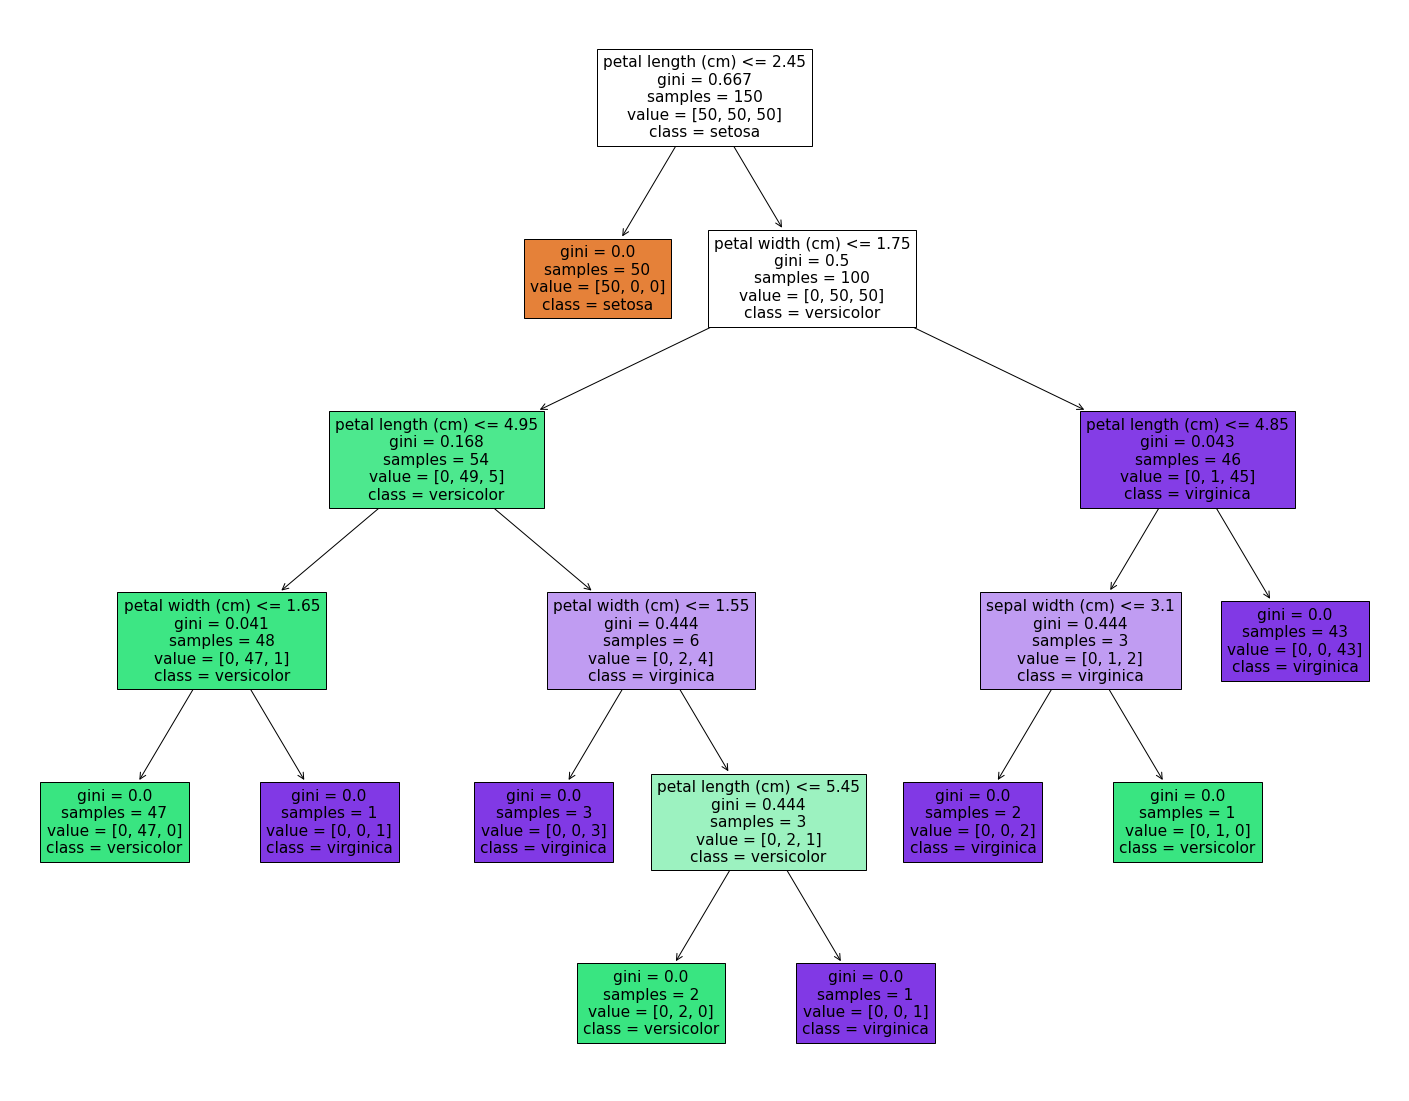

In [7]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

# 4.2 Visualization of Decision Tree with Text Representation

Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file.

In [8]:
#Print Text Representation
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



# 4.3 Visualization of  Decision Tree with graphviz

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor", fillcolor="#4de88e"] ;
2 -> 3 ;
4 [label="petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor", fillcolor="#3de684"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor", fillcolor="#39e581"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica",

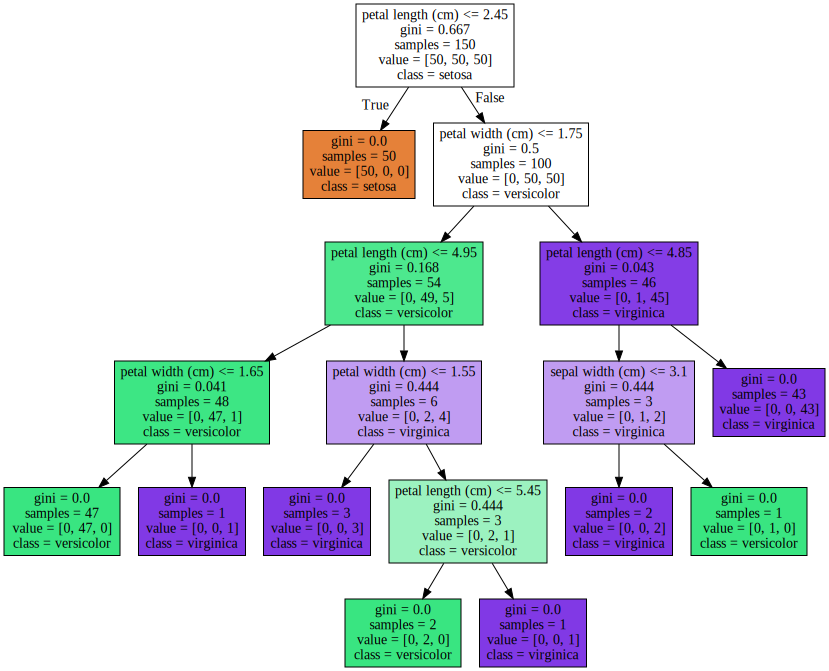

In [9]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)
print(dot_data)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph